In [ ]:
pip install pandas

In [ ]:
import pandas as pd

data = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
data

country  ...                                    winery
0          Italy  ...                                   Nicosia
1       Portugal  ...                       Quinta dos Avidagos
2             US  ...                                 Rainstorm
3             US  ...                                St. Julian
4             US  ...                              Sweet Cheeks
...          ...  ...                                       ...
129966   Germany  ...  Dr. H. Thanisch (Erben Müller-Burggraef)
129967        US  ...                                  Citation
129968    France  ...                           Domaine Gresser
129969    France  ...                      Domaine Marcel Deiss
129970    France  ...                          Domaine Schoffit

[129971 rows x 13 columns]

In [ ]:
# Какие есть страны и откуда чаще всего вина

data.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

In [ ]:
# Средняя оценка по стране и по региону

data[["country", "province", "points"]].groupby(["country", "province"]).mean()

points
country   province                   
Argentina Mendoza Province  86.826593
          Other             86.001866
Armenia   Armenia           87.500000
Australia Australia Other   85.518367
          New South Wales   87.694118
...                               ...
Uruguay   Juanico           86.333333
          Montevideo        88.272727
          Progreso          86.818182
          San Jose          84.000000
          Uruguay           86.833333

[425 rows x 1 columns]

In [ ]:
data[["country", "province", "points"]].groupby(["country", "province"]).agg('mean', 'median')

points
country   province                   
Argentina Mendoza Province  86.826593
          Other             86.001866
Armenia   Armenia           87.500000
Australia Australia Other   85.518367
          New South Wales   87.694118
...                               ...
Uruguay   Juanico           86.333333
          Montevideo        88.272727
          Progreso          86.818182
          San Jose          84.000000
          Uruguay           86.833333

[425 rows x 1 columns]

In [ ]:
# Топ 10 стран по количеству вин

a = data.country.value_counts()[:10]

a.index
a.values

array([54504, 22093, 19540,  6645,  5691,  4472,  3800,  3345,  2329,
        2165])

In [ ]:
# isin для списка
data[data.country.isin(a.index)][["country", "province", "points"]].groupby(["country", "province"]).agg('mean', 'median')

points
country   province                    
Argentina Mendoza Province   86.826593
          Other              86.001866
Australia Australia Other    85.518367
          New South Wales    87.694118
          South Australia    89.037806
...                                ...
US        Texas              85.212766
          Vermont            84.333333
          Virginia           85.611326
          Washington         88.947216
          Washington-Oregon  88.428571

[185 rows x 1 columns]

In [ ]:
data[data.country == "Australia"][["country", "province", "points"]].groupby(["country", "province"]).agg('mean', 'median')

points
country   province                    
Australia Australia Other    85.518367
          New South Wales    87.694118
          South Australia    89.037806
          Tasmania           89.071429
          Victoria           88.869565
          Western Australia  88.912587

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f457a933890>]],
      dtype=object)

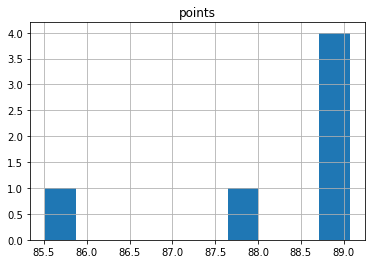

In [ ]:
grouped = data[data.country == "Australia"][["country", "province", "points"]].groupby(["country", "province"]).agg('mean', 'median')
grouped.hist()

In [ ]:
# Какой сорт вина чаще всего используют?

data[['variety', 'points', "price"]].groupby(["variety"]).mean().sort_values("points", ascending = False)

points  price
variety                             
Terrantez           95.000000  236.0
Tinta del Pais      95.000000   47.5
Gelber Traminer     95.000000   35.0
Bual                94.142857  100.0
Sercial             94.000000   50.0
...                       ...    ...
Shiraz-Tempranillo  82.000000    8.5
Aidani              82.000000   27.0
Picapoll            82.000000   21.0
Airen               81.666667    9.0
Chancellor          80.500000   16.0

[707 rows x 2 columns]

In [ ]:
# Выбрать год из title

data.title

0                         Nicosia 2013 Vulkà Bianco  (Etna)
1             Quinta dos Avidagos 2011 Avidagos Red (Douro)
2             Rainstorm 2013 Pinot Gris (Willamette Valley)
3         St. Julian 2013 Reserve Late Harvest Riesling ...
4         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
                                ...                        
129966    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
129967                    Citation 2004 Pinot Noir (Oregon)
129968    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
129969        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
129970    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 129971, dtype: object

In [ ]:
data["year"] = data.title.apply(lambda x: ''.join([i for i in x.split() if i.isdigit() and len(i) == 4]))
data.head(10)

country  ...  year
0     Italy  ...  2013
1  Portugal  ...  2011
2        US  ...  2013
3        US  ...  2013
4        US  ...  2012
5     Spain  ...  2011
6     Italy  ...  2013
7    France  ...  2012
8   Germany  ...  2013
9    France  ...  2012

[10 rows x 14 columns]

In [ ]:
data.year.apply(len).value_counts()

4     124896
8        459
12         7
Name: year, dtype: int64

In [ ]:
data.drop(data.year[data.year.apply(len) != 4].index, inplace = True)

In [ ]:
data.drop(data[data.year == str()].index, inplace = True)
data.year

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 124896, dtype: object

In [ ]:
data.year.astype(int)

0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 124896, dtype: int64

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
df = data.copy()
fig = px.scatter(df, x = 'year', y = 'price', color = 'price', hover_name = 'variety')
fig.show()